## MLOPS - Assigment 1

Task 1

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Acquisition

- This section loads the Heart Disease UCI dataset from the UCI repository.
- The dataset contains clinical attributes such as age, cholesterol, and blood pressure.
- The goal is to predict the presence or absence of heart disease.


In [28]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

columns = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal", "target"
]

df = pd.read_csv(url, names=columns)

df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


## Data Cleaning and Preprocessing

- This step identifies and handles missing values in the dataset.
- Non-numeric values are converted to numeric format.
- These operations prepare the data for machine learning models.


In [29]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check missing values
df.isnull().sum()

# Fill missing values with median
df.fillna(df.median(), inplace=True)

df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


## Target Variable Transformation

- The target variable represents heart disease severity.
- This step converts the target into a binary classification format.


In [30]:
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

df["target"].value_counts()


,count
target,
0,164
1,139


## Exploratory Data Analysis – Class Distribution

- This plot visualizes the distribution of target classes.
- It helps in identifying class imbalance in the dataset.


## Exploratory Data Analysis – Age Distribution

- This visualization shows the age distribution of patients.
- It provides insight into the affected age groups.


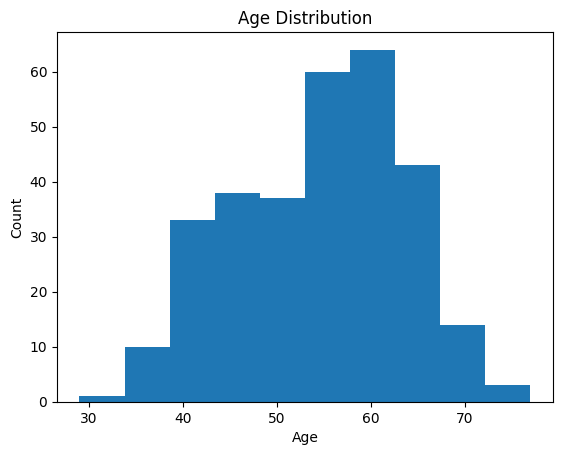

In [31]:
plt.hist(df["age"], bins=10)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()


## Exploratory Data Analysis – Correlation Analysis

- This heatmap shows correlations between numerical features.
- It helps in understanding relationships between variables.


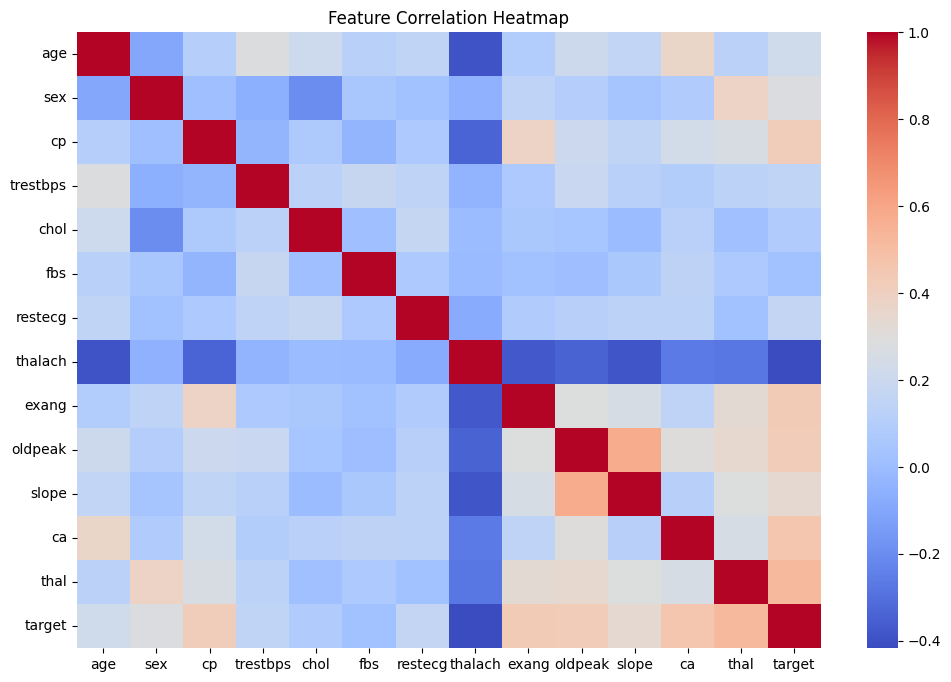

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Assuming 'df' is available from previously executed cells.
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

pipe.fit(X_train, y_train)
pipe.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1])

Task 2

In [34]:
!pip install mlflow

import mlflow
import mlflow.sklearn

mlflow.set_experiment("Heart Disease Classification")

<Experiment: artifact_location='/content/mlruns/1', creation_time=1766581565619, experiment_id='1', last_update_time=1766581565619, lifecycle_stage='active', name='Heart Disease Classification', tags={}>

## Train–Test Split

- This step splits the dataset into training and testing sets.
- Stratification is applied to preserve class distribution.


In [35]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

y_test.value_counts()


,count
target,
0,33
1,28


In [36]:
mlflow.set_experiment("Heart Disease Classification")


<Experiment: artifact_location='/content/mlruns/1', creation_time=1766581565619, experiment_id='1', last_update_time=1766581565619, lifecycle_stage='active', name='Heart Disease Classification', tags={}>

In [37]:
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)
df["target"].value_counts()



,count
target,
0,164
1,139


## Logistic Regression Model

- This section trains a Logistic Regression model.
- Feature scaling is applied using StandardScaler.


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
with mlflow.start_run(run_name="Logistic Regression"):

    log_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=1000))
    ])

    # Train
    log_pipeline.fit(X_train, y_train)

    # Predict
    y_pred = log_pipeline.predict(X_test)
    y_prob = log_pipeline.predict_proba(X_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    # Log params
    mlflow.log_param("model", "Logistic Regression")
    mlflow.log_param("max_iter", 1000)

    # Log metrics
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("roc_auc", roc)

    # Log model
    mlflow.sklearn.log_model(log_pipeline, "logistic_model")

    print("Logistic Regression ROC-AUC:", roc)

2025/12/24 13:09:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logistic Regression ROC-AUC: 0.9512987012987013


## Experiment Tracking – Logistic Regression

- Logistic Regression training is tracked using MLflow.
- Model parameters, evaluation metrics, and the trained model are logged.


## Random Forest Model

- This section trains a Random Forest classifier.
- The model captures non-linear relationships in the data.


In [39]:
from sklearn.ensemble import RandomForestClassifier

with mlflow.start_run(run_name="Random Forest"):

    rf_model = RandomForestClassifier(
        n_estimators=100,
        random_state=42
    )

    # Train
    rf_model.fit(X_train, y_train)

    # Predict
    y_pred_rf = rf_model.predict(X_test)
    y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred_rf)
    prec = precision_score(y_test, y_pred_rf)
    rec = recall_score(y_test, y_pred_rf)
    roc = roc_auc_score(y_test, y_prob_rf)

    # Log params
    mlflow.log_param("model", "Random Forest")
    mlflow.log_param("n_estimators", 100)

    # Log metrics
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("roc_auc", roc)

    # Log model
    mlflow.sklearn.log_model(rf_model, "random_forest_model")

    # Optional prints
    print("Random Forest ROC-AUC:", roc)


2025/12/24 13:09:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Random Forest ROC-AUC: 0.9518398268398268


In [40]:
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

Logistic Regression ROC-AUC: 0.9512987012987013
Random Forest ROC-AUC: 0.9518398268398268


## Experiment Tracking – Random Forest

- Random Forest training is tracked using MLflow.
- Model parameters, evaluation metrics, and trained artifacts are logged.


## Model Comparison and Selection

- Random Forest achieved higher ROC-AUC compared to Logistic Regression.
- Based on evaluation metrics, Random Forest was selected as the final model.


## Task 4 – Model Packaging & Reproducibility

- The final trained Random Forest model is packaged into a reusable artifact.
- The model is saved using pickle to enable loading in downstream applications.
- A requirements.txt file is generated to ensure environment reproducibility.
- This packaged model can be directly consumed by API, Docker, and deployment pipelines.


In [41]:
import pickle
import os

os.makedirs("artifacts", exist_ok=True)

with open("artifacts/model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("Model saved as artifacts/model.pkl")


Model saved as artifacts/model.pkl


In [42]:
requirements = """numpy
pandas
scikit-learn
mlflow
matplotlib
seaborn
"""

with open("artifacts/requirements.txt", "w") as f:
    f.write(requirements)

print("requirements.txt created")


requirements.txt created


In [43]:
with open("artifacts/model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

loaded_model.predict(X_test[:5])


array([0, 1, 0, 0, 0])

In [44]:
from google.colab import files

files.download("artifacts/model.pkl")
files.download("artifacts/requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>